In [1]:
import pandas as pd
import requests
import json

In [2]:
url = f"https://www.fpbase.org/api/proteins/spectra/"
response = requests.get(url)
fp = json.loads(response.content)

In [3]:
len(fp)

436

In [5]:
fp[2]['name']

'cgfTagRFP'

In [9]:
fp[2]['spectra']

[{'state': 'default_ex',
  'ec': 90000,
  'max': 556,
  'data': [[426.0, 0.0416],
   [427.0, 0.0416],
   [428.0, 0.0416],
   [429.0, 0.0416],
   [430.0, 0.0416],
   [431.0, 0.0416],
   [432.0, 0.0416],
   [433.0, 0.0416],
   [434.0, 0.0416],
   [435.0, 0.0416],
   [436.0, 0.0416],
   [437.0, 0.0416],
   [438.0, 0.0416],
   [439.0, 0.0416],
   [440.0, 0.0416],
   [441.0, 0.0416],
   [442.0, 0.0416],
   [443.0, 0.0416],
   [444.0, 0.0416],
   [445.0, 0.0417],
   [446.0, 0.0421],
   [447.0, 0.0424],
   [448.0, 0.0428],
   [449.0, 0.0432],
   [450.0, 0.0436],
   [451.0, 0.0439],
   [452.0, 0.0444],
   [453.0, 0.0451],
   [454.0, 0.0458],
   [455.0, 0.0464],
   [456.0, 0.0471],
   [457.0, 0.0478],
   [458.0, 0.0485],
   [459.0, 0.0492],
   [460.0, 0.0506],
   [461.0, 0.0523],
   [462.0, 0.0541],
   [463.0, 0.0558],
   [464.0, 0.0575],
   [465.0, 0.0592],
   [466.0, 0.061],
   [467.0, 0.0627],
   [468.0, 0.0644],
   [469.0, 0.0661],
   [470.0, 0.0678],
   [471.0, 0.0696],
   [472.0, 0.0713],

In [12]:
def wavelength_to_rgb(wavelength):
    if 380 <= wavelength <= 440:
        R, G, B = -(wavelength - 440) / (440 - 380), 0.0, 1.0
    elif 440 < wavelength <= 490:
        R, G, B = 0.0, (wavelength - 440) / (490 - 440), 1.0
    elif 490 < wavelength <= 510:
        R, G, B = 0.0, 1.0, -(wavelength - 510) / (510 - 490)
    elif 510 < wavelength <= 580:
        R, G, B = (wavelength - 510) / (580 - 510), 1.0, 0.0
    elif 580 < wavelength <= 645:
        R, G, B = 1.0, -(wavelength - 645) / (645 - 580), 0.0
    elif 645 < wavelength <= 780:
        R, G, B = 1.0, 0.0, 0.0
    else:
        R = G = B = 0.0

    # Adjust intensity for wavelengths outside of visible range
    if wavelength < 380 or wavelength > 780:
        S = 0.0
    elif 380 <= wavelength <= 420:
        S = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 645 < wavelength <= 780:
        S = 0.3 + 0.7 * (780 - wavelength) / (780 - 645)
    else:
        S = 1.0

    R, G, B = round(R * S, 3), round(G * S, 3), round(B * S, 3)
    return (R, G, B)

In [31]:
data = pd.read_json('../data/spectrum_extracted.json', orient="records", lines=True)

In [17]:
from matplotlib import pyplot as plt

In [41]:
import numpy as np
from matplotlib.patches import Rectangle

In [92]:
def plot_spectrum(spectrum):
    range = np.array(spectrum['default_ex']) + np.array(spectrum['default_em'])
    start = next((i for i, x in enumerate(range) if x != 0), None) - 50
    end = next((i for i, x in enumerate(reversed(range)) if x != 0), None)
    print(end)
    if start is not None and end is not None:
        end = len(range) - 1 - end + 50
    print(start, end, len(range), spectrum['default_em'][end-10:end])
    wavelengths = np.arange(start, end)
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(wavelengths, spectrum['default_ex'][start:end], label="Excitation", color="red", linewidth=2)
    ax.plot(wavelengths, spectrum['default_em'][start:end], label="Emission", color="blue", linewidth=2)
    for wl in wavelengths:
        color = wavelength_to_rgb(wl)
        rect = Rectangle((wl, 0), 1, 0.03, color=color, transform=ax.transData, clip_on=False)
        ax.add_patch(rect)
    ax.set_title(f"Excitation and Emission Spectrum for {spectrum['name']}")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity")
    ax.legend(frameon=False)
    ax.set_xlim(start, end)
    ax.set_ylim(0, 1)
    plt.show()

1202
270 648 1801 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


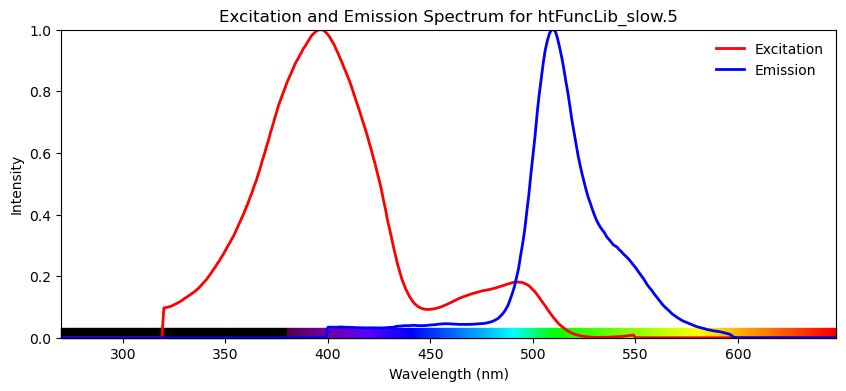

In [93]:
for i in data.iterrows():
    plot_spectrum(i[1])
    # print(i[1])
    break

In [94]:
data

,name,default_ex,default_em
0,htFuncLib_slow.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,cgfTagRFP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,htFuncLib_fast.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,CGP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,miniGFP1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
356,AzamiGreen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
357,SOPP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
358,FusionRed-MQV,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
359,mNeonGreen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
